In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(123)

n   = 200
rho = 0.5
mu  = [0, 0]
sig = np.array([[1, rho], [rho, 1]])

nr = np.random.multivariate_normal(mu, sig, n)
l, g = np.linalg.eig(sig)
sh = np.dot(g, np.dot(np.diag(np.sqrt(l)), g.T))
x = np.dot(nr, sh.T)

direction1 = [g[0][0], g[1][0]]
direction2 = [g[0][1], g[1][1]]
norm = [round(np.dot(np.array(direction1), np.array(direction1))), 
        round(np.dot(np.array(direction2), np.array(direction2)))]
direction1 = direction1 / np.sqrt(norm[0])
direction2 = direction2 / np.sqrt(norm[1])

pd1 = np.sort(np.dot(x, direction1))
d31 = np.array([np.multiply(pd1, direction1[0]), np.multiply(pd1, direction1[1])])
pd2 = np.sort(np.dot(x, direction2))
d32 = np.array([np.multiply(pd2, direction2[0]), np.multiply(pd2, direction2[1])])
d4 = pd.DataFrame([x[:,0], [0]*n]).T
d5 = pd.DataFrame([x[:,1], [0]*n]).T

varexp1 = np.var(pd1)
r11 = round(varexp1, 2)

varexp2 = np.var(pd2)
r12 = round(varexp2, 2)

varsum = sum(np.array([np.var(x[:,0]), np.var(x[:,1])]))
r2 = round(varsum, 2)
varperc1 = varexp1 / varsum

r31 = round(varperc1, 2)
varperc2 = varexp2 / varsum

r32 = round(varperc2, 2)

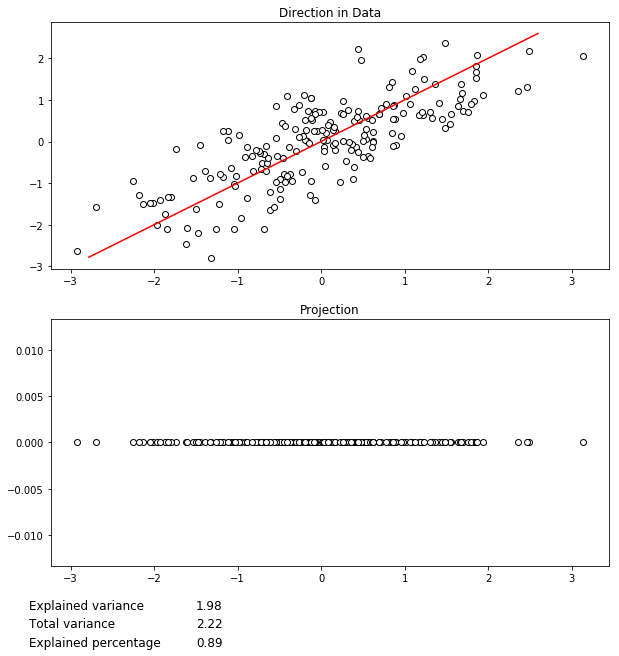

In [143]:
fig, axes = plt.subplots(2, 1, figsize = (10, 10))
axes[0].scatter(x[:,0], x[:,1], c = "w", edgecolors = "black")
axes[0].plot(d31[0], d31[1], c = "r")
axes[0].set_title("Direction in Data")

axes[1].scatter(d4[0], d4[1], c = "w", edgecolors = "black")
axes[1].set_title("Projection")

h = -0.018
for i, j in zip(["Explained variance", "Total variance", "Explained percentage"], [r11, r2, r31]):
    plt.text(-3.5, h, i, fontsize=12)
    plt.text(-1.5, h, str(j), fontsize=12)
    h -= 0.002

plt.show()

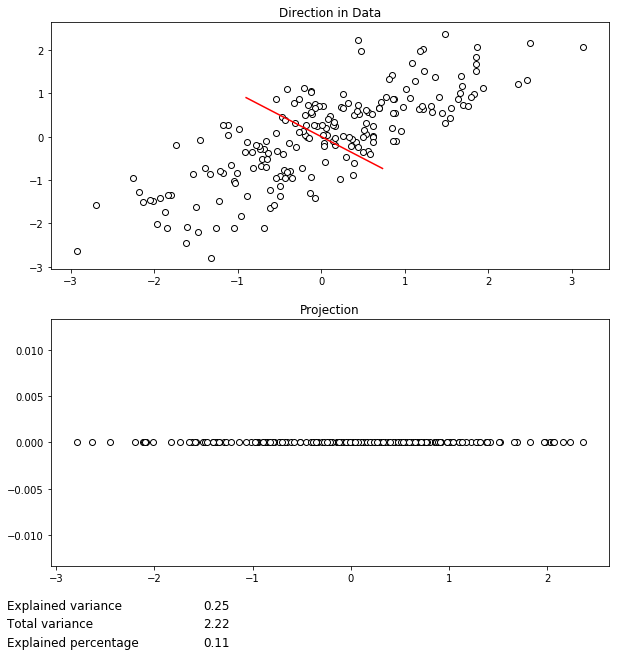

In [145]:
fig, axes = plt.subplots(2, 1, figsize = (10, 10))
axes[0].scatter(x[:,0], x[:,1], c = "w", edgecolors = "black")
axes[0].plot(d32[0], d32[1], c = "r")
axes[0].set_title("Direction in Data")

axes[1].scatter(d5[0], d5[1], c = "w", edgecolors = "black")
axes[1].set_title("Projection")

h = -0.018
for i, j in zip(["Explained variance", "Total variance", "Explained percentage"], [r12, r2, r32]):
    plt.text(-3.5, h, i, fontsize=12)
    plt.text(-1.5, h, str(j), fontsize=12)
    h -= 0.002

plt.show()